# Model Inference using a "Bayesian belief approach"

## Dependencies

In [1]:
from netin.models import HomophilyModel
from netin.models import PAModel
from netin.models import PAHModel
from netin.models import PATCHModel
from netin.models import CompoundLFM
from netin.models import BarabasiAlbertModel
from netin.algorithms.janus import JanusModelFitting

## Constants

In [2]:
OUTPUT_DIR = 'inference_results'
FIGSIZE = (6,3) 

## Network

In [3]:
N=1000
m=2
f_m=0.5
h_m=0.2
h_M=0.2
seed=1234

In [4]:
g = PAHModel(N=N, m=2, f_m=f_m, h_m=h_m, h_M=h_M, seed=seed)
g = g.simulate()

## Janus
see [Espin-Noboa2017]

In [5]:
is_global = False
k_max = 10
k_log_scale = False
verbose = False
j = JanusModelFitting(graph=g, is_global=is_global, k_max=k_max, k_log_scale=k_log_scale, verbose=verbose)

### Default hypotheses

In [ ]:
h = j.get_uniform_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [7]:
h = j.get_self_loop_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

In [8]:
h = j.get_data_hypothesis()
e = j.generate_evidences(h)
j.add_evidences(h.name, e)
del(h)

### Link formation hypotheses (belief-based / approximations)

In [9]:
# PA model
e = j.model_fitting_belief_based(PAModel, first_mover_bias=True)
j.update_evidences(e)

In [10]:
# Homophily model
e = j.model_fitting_belief_based(HomophilyModel, first_mover_bias=True)
j.update_evidences(e)

In [11]:
# PAH model
e = j.model_fitting_belief_based(PAHModel, first_mover_bias=True)
j.update_evidences(e)

### Evidence & Bayes factors

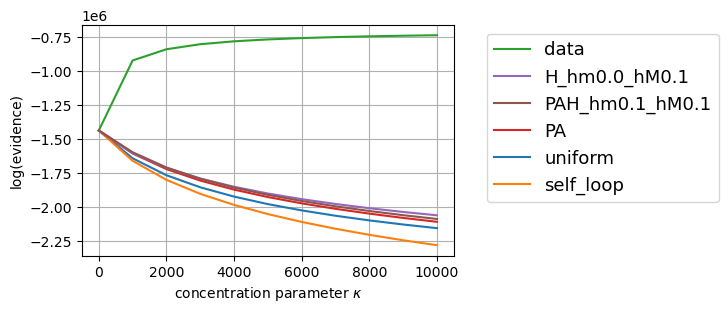

In [12]:
j.plot_evidences(figsize=FIGSIZE, bboxx=1.4,
                output_dir=OUTPUT_DIR)

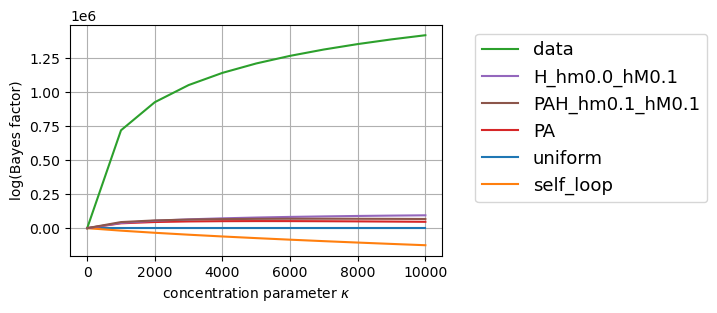

In [13]:
j.plot_evidences(bayes_factors=True, 
                 figsize=FIGSIZE, bboxx=1.4,
                 output_dir=OUTPUT_DIR)

### Store

In [14]:
j.save_evidences(OUTPUT_DIR)